In [1]:
'Import core libraries'
import numpy as np
import math
from fastdist import fastdist as fd
from sklearn.metrics import silhouette_score
from scipy.optimize import linear_sum_assignment as linear_assignment
from tqdm import tqdm
from matplotlib import pyplot as plt

'Import user-defined libraries'
from hsiUtilities.crism_ganProc_utils import crism_ganProc_utils
from SemiSupervisedKMeans.semiSupervised_kmeans import KMeans

In [2]:
'Load the test data'
with open('trail.npy', 'rb') as f:
    x = np.load(f)
    y = np.load(f)

(20000, 240, 1)
(20000,)


In [3]:
'Mask classes  7-12 to be unknown classes'
y_probe = y.copy()
y_probe[y_probe >= 7] = -1

'Get 4 classes to be in the anchor set'
known_classes = [0, 1, 2, 3]
known_data = []
for ii in known_classes:
    'Find some example of chosen supervised class'
    temp = np.where(y_probe == ii)[0]
    'Add them to the list of known data'
    known_data += [temp]

In [4]:
'Create the feature extractor of interest'
disRep = crism_ganProc_utils().create_rep_model()

'Get the feature space representation for the data'
x_rep = disRep.predict(x)
x_rep = x_rep.astype(np.float64)

In [8]:
'Using the cluster estimation technique from Han et al- the number of clusters was estimated at 15'
kmeans_semi = KMeans(k=15, known_data=known_data, verbose=False)
kmeans_semi_results = kmeans_semi.fit_predict(x_rep)

In [19]:
'Find the means of the identified clusters'
x_clust_mean= []
nSamp= []
for ii in range(15):
    idx = np.where(kmeans_semi_results == ii)[0]
    x_clust = np.squeeze(x[idx])
    x_clust_mean.append(np.mean(x_clust, axis=0))
    nSamp.append(idx.shape[0])
    
x_clust_mean = np.asarray(x_clust_mean)
print(x_clust_mean.shape)

(15, 240)


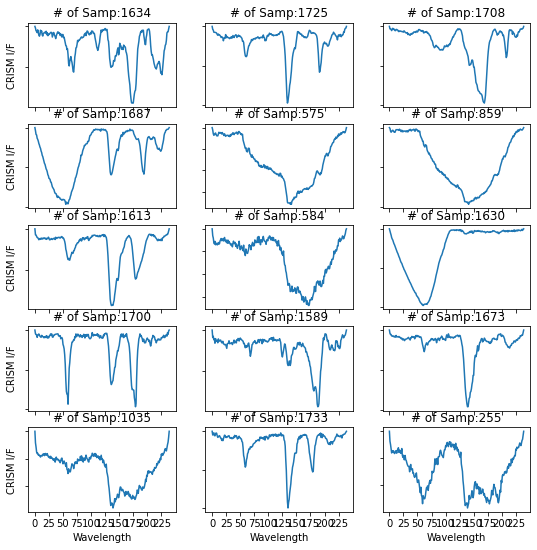

In [22]:
fig12, ax = plt.subplots(5,3,sharex=True, figsize=(9,9))
for ii in range(15):
    row = ii // 3
    col = ii % 3
    
    ax[row, col].plot(range(240), x_clust_mean[ii])
    
    if row == 4:
        ax[row, col].set_xlabel('Wavelength')
        ax[row, col].set_xticks(np.arange(0, 240, 25))
            
    if col == 0:
        ax[row, col].set_ylabel('CRISM I/F')
        
    
    ax[row, col].axes.yaxis.set_ticklabels([])  
    ax[row, col].set_title(('# of Samp:' + str(nSamp[ii])))